In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns

import keras
import os, shutil

C:\Users\Laurens\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Convolutional Networks

## loading data

In [2]:


original_dataset_loc = '/Users/Laurens/Documents/IE-BIGDATA/Term 3/Machine Learning III/cats_dogs_big'

base_dir = '/Users/Laurens/Documents/IE-BIGDATA/Term 3/Machine Learning III/cats_dogs_small'
#os.mkdir(base_dir)

In [3]:
#making directories for smaller set
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [17]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [19]:
#compiling
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

## preprocessing images

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [26]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 127s 1s/step - loss: 0.6897 - acc: 0.5310 - val_loss: 0.6825 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 115s 1s/step - loss: 0.6700 - acc: 0.5936 - val_loss: 0.6512 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 115s 1s/step - loss: 0.6287 - acc: 0.6530 - val_loss: 0.6350 - val_acc: 0.6210
Epoch 4/30
100/100 [==============================] - 126s 1s/step - loss: 0.5917 - acc: 0.6890 - val_loss: 0.5957 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 117s 1s/step - loss: 0.5584 - acc: 0.7025 - val_loss: 0.5841 - val_acc: 0.6820
Epoch 6/30
100/100 [==============================] - 116s 1s/step - loss: 0.5197 - acc: 0.7415 - val_loss: 0.5615 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 112s 1s/step - loss: 0.5011 - acc: 0.7490 - val_loss: 0.5578 - val_acc: 0.7140
Epoch 8/30
100/100 [==============================] - 122s 1s/step - 

In [27]:
model.save('cats_and_dogs_small_1.h5')

## plotting training and validation accuracy


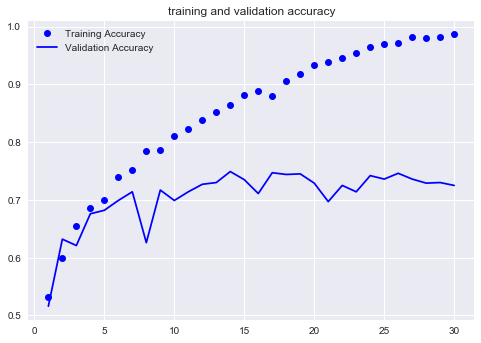

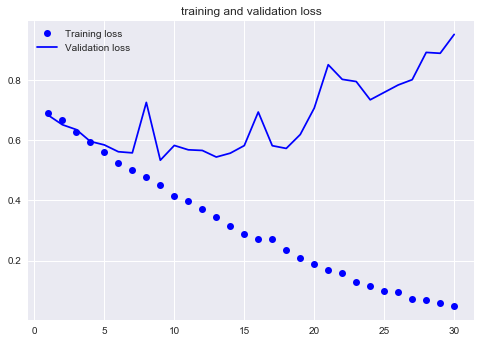

In [30]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

The model is clearly overfitting (see disconnect between training acc and validation acc. Let's fix this by artificially increasing the training set through generation of new images.

## Overfit reduction
### Data Augmentation & Dropout layer

Let's augment some of the train images to get a bigger set through ImageDataGenerator

In [4]:
from keras.preprocessing.image import ImageDataGenerator

#augment the train set to create more instances to train on
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

#dont augment the validation set!
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2002 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Set new model with droplout layer

In [6]:
from keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                 input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#compiling
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

Train new model

In [7]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 100,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 116s 1s/step - loss: 0.6940 - acc: 0.5050 - val_loss: 0.7113 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 119s 1s/step - loss: 0.6878 - acc: 0.5535 - val_loss: 0.6977 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - 117s 1s/step - loss: 0.6792 - acc: 0.5770 - val_loss: 0.6535 - val_acc: 0.6270
Epoch 4/100
100/100 [==============================] - 117s 1s/step - loss: 0.6665 - acc: 0.5995 - val_loss: 0.6403 - val_acc: 0.6400
Epoch 5/100
100/100 [==============================] - 118s 1s/step - loss: 0.6570 - acc: 0.6230 - val_loss: 0.6188 - val_acc: 0.6520
Epoch 6/100
100/100 [==============================] - 116s 1s/step - loss: 0.6392 - acc: 0.6355 - val_loss: 0.6117 - val_acc: 0.6630
Epoch 7/100
100/100 [==============================] - 116s 1s/step - loss: 0.6387 - acc: 0.6410 - val_loss: 0.5949 - val_acc: 0.6830
Epoch 8/100
100/100 [==============================] - 115s 1s

Epoch 62/100
100/100 [==============================] - 137s 1s/step - loss: 0.4540 - acc: 0.7880 - val_loss: 0.5141 - val_acc: 0.7580
Epoch 63/100
100/100 [==============================] - 128s 1s/step - loss: 0.4494 - acc: 0.7860 - val_loss: 0.4671 - val_acc: 0.7710
Epoch 64/100
100/100 [==============================] - 127s 1s/step - loss: 0.4420 - acc: 0.7935 - val_loss: 0.5330 - val_acc: 0.7600
Epoch 65/100
100/100 [==============================] - 140s 1s/step - loss: 0.4487 - acc: 0.7880 - val_loss: 0.4378 - val_acc: 0.7920
Epoch 66/100
100/100 [==============================] - 123s 1s/step - loss: 0.4271 - acc: 0.8010 - val_loss: 0.4336 - val_acc: 0.8090
Epoch 67/100
100/100 [==============================] - 121s 1s/step - loss: 0.4471 - acc: 0.7875 - val_loss: 0.4614 - val_acc: 0.7920
Epoch 68/100
100/100 [==============================] - 127s 1s/step - loss: 0.4446 - acc: 0.7975 - val_loss: 0.4436 - val_acc: 0.7920
Epoch 69/100
100/100 [==============================] -

In [8]:
model.save('cats_and_dogs_small_2.h5')

In [18]:
print("highest accuracy obtained:", max(history.history['acc']))
print("epoch of highest accuracy:", np.argmax(history.history['acc']))

highest accuracy obtained: 0.8294651876424565
epoch of highest accuracy: 88


New plots

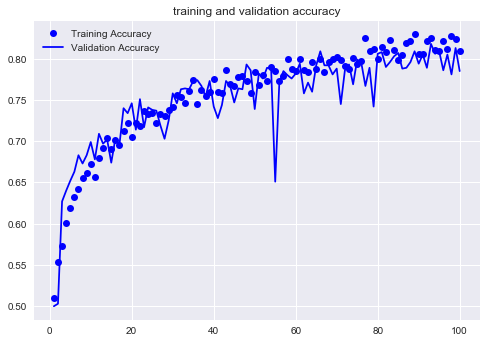

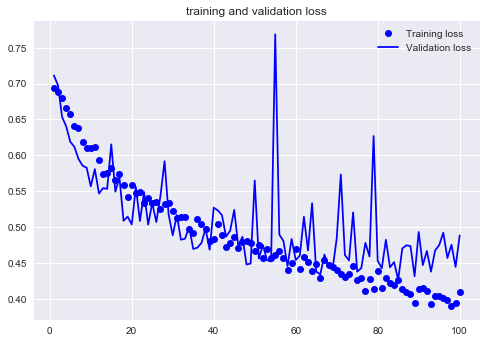

In [9]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

## Pre-trained networks
### VGG16 covnet pretrained

In [20]:
#import
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top = False, #exclude the dense layers at the top!
                 input_shape = (150,150,3))


conv_base.summary()

58892288/58889256 [==============================] - 55s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo

### two methods:
- Run conv_base over images once and feed results into newly setup dense layer network
- extend conv_base with dense layers (far more expensive but can use data augmentation)

### Method 1: Fast feature extraction without data augmentation

In [29]:
base_dir = '/Users/Laurens/Documents/IE-BIGDATA/Term 3/Machine Learning III/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    #first setup an empty numpy array with size of input (amount of pics),
    #and second part the size of the output block in the conv_base
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    #setup another numpy array with size of input (amount of pics) for labels
    labels = np.zeros(shape=(sample_count))
    #setup the generator to get images from dir and setup batch size etc
    #Takes the path to a directory, and generates batches of augmented/normalized data.
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size = batch_size,
                                            class_mode = 'binary')
    
    #setup a counter and a loop to go through all the pictures in chunks
    
    i=0
    for inputs_batch, labels_batch in generator:
        #extract the features from the pre-trained model from the first batch
        features_batch = conv_base.predict(inputs_batch)
        #get first batch and save them as features with correct labels
        features[i * batch_size : (i +1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        #add one to iterator
        i += 1
        
        #add verbosity
        if i % 10 == 0:
            print("Progress so far:", i)
        
        #make sure to setup a break argument since otherwise this keeps going
        #since we are iterating over a generator
        if i * batch_size >= sample_count:
            break
    
    return features, labels

In [30]:
#Use the function to get train, test and val sets

train_features, train_labels = extract_features(train_dir, 2000)

val_features, val_labels = extract_features(validation_dir, 1000)

test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Progress so far: 10
Progress so far: 20
Progress so far: 30
Progress so far: 40
Progress so far: 50
Progress so far: 60
Progress so far: 70
Progress so far: 80
Progress so far: 90
Progress so far: 100
Found 1000 images belonging to 2 classes.
Progress so far: 10
Progress so far: 20
Progress so far: 30
Progress so far: 40
Progress so far: 50
Found 1000 images belonging to 2 classes.
Progress so far: 10
Progress so far: 20
Progress so far: 30
Progress so far: 40
Progress so far: 50


In [31]:
#the shape of the extracted features is (sample_count, 4, 4, 512) so
#we feed this to a dense layers after flattening first to (samples, 8192)

train_features = np.reshape(train_features, (2000, 4*4*512))
val_features = np.reshape(val_features, (1000, 4*4*512))
test_featuers = np.reshape(test_features, (1000, 4*4*512))

In [33]:
#Setup the new densely layered model with dropout layer
model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
             loss= 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(train_features, train_labels,
                   epochs = 30,
                   batch_size = 20,
                   validation_data = (val_features, val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6008 - acc: 0.6730 - val_loss: 0.4504 - val_acc: 0.8410
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4302 - acc: 0.8100 - val_loss: 0.3639 - val_acc: 0.8580
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3522 - acc: 0.8530 - val_loss: 0.3196 - val_acc: 0.8740
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3114 - acc: 0.8700 - val_loss: 0.2998 - val_acc: 0.8780
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2812 - acc: 0.8945 - val_loss: 0.2813 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2657 - acc: 0.8975 - val_loss: 0.2968 - val_acc: 0.8710
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2534 - acc: 0.9010 - val_loss: 0.2705 - val_acc: 0.8870
Epoch 8/30
200

Lets plot accuracy and loss

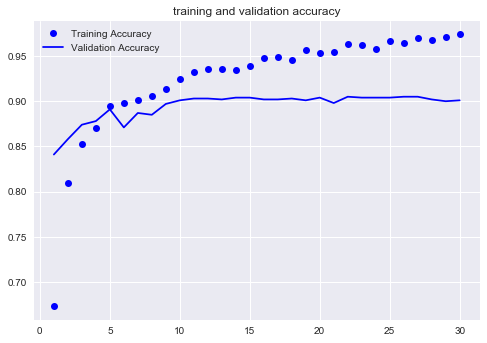

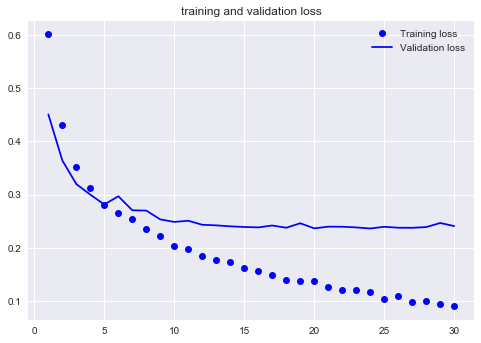

In [34]:
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

## Method 2: Feature extraction with Data Augmentation

### can't do on this pc -- too expensive, need GPU